In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from datetime import datetime

In [2]:
train = pd.read_csv('F:\Datasets\Train.csv',engine='python', encoding='utf-8', error_bad_lines=False)
train.head()
type(train)
tag_data = train['Tags'].values

print(tag_data)

['php image-processing file-upload upload mime-types' 'firefox'
 'r matlab machine-learning' ...
 'logging google google-analytics traffic adwords' 'microsoft-excel-2010'
 'sql-server-2005 tsql pivot']


Skipping line 49413: unexpected end of data


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(tokenizer = lambda x: x.split())

tag_dtm = vect.fit_transform(tag_data)

In [4]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 49411
Number of unique tags : 13822


In [5]:

tags = vect.get_feature_names()

print("Some of the tags we have :", tags[:10])

Some of the tags we have : ['.class-file', '.each', '.emf', '.hgtags', '.htaccess', '.htpasswd', '.mov', '.net', '.net-1.1', '.net-2.0']


In [6]:
freqs = tag_dtm.sum(axis=0).A1

result = list(zip(tags, freqs)) 
tag_df = pd.DataFrame(result, columns = ['Tags', 'Counts'])  

In [7]:
tag_df.head()

,Tags,Counts
0,.class-file,1
1,.each,6
2,.emf,1
3,.hgtags,1
4,.htaccess,173


In [8]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False) #sorting each tag in descending order of number of occurence
tag_counts = tag_df_sorted['Counts'].values

In [9]:
tag_counts

array([3811, 3375, 3196, ...,    1,    1,    1], dtype=int64)

In [10]:
tag_quest_count = tag_dtm.sum(axis=1).tolist()
print(len(tag_quest_count))

49411


In [11]:
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

print(tag_quest_count[:5])

We have total 49411 datapoints.
[5, 1, 3, 3, 3]


In [12]:
len(tag_quest_count)

49411

In [13]:
print( "Maximum number of tags per question: %d"%max(tag_quest_count))
print( "Minimum number of tags per question: %d"%min(tag_quest_count))
print( "Avg. number of tags per question: %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.886301


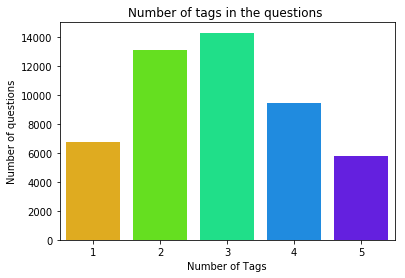

In [14]:
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

In [15]:
dic = {}
dic = dict(result) 

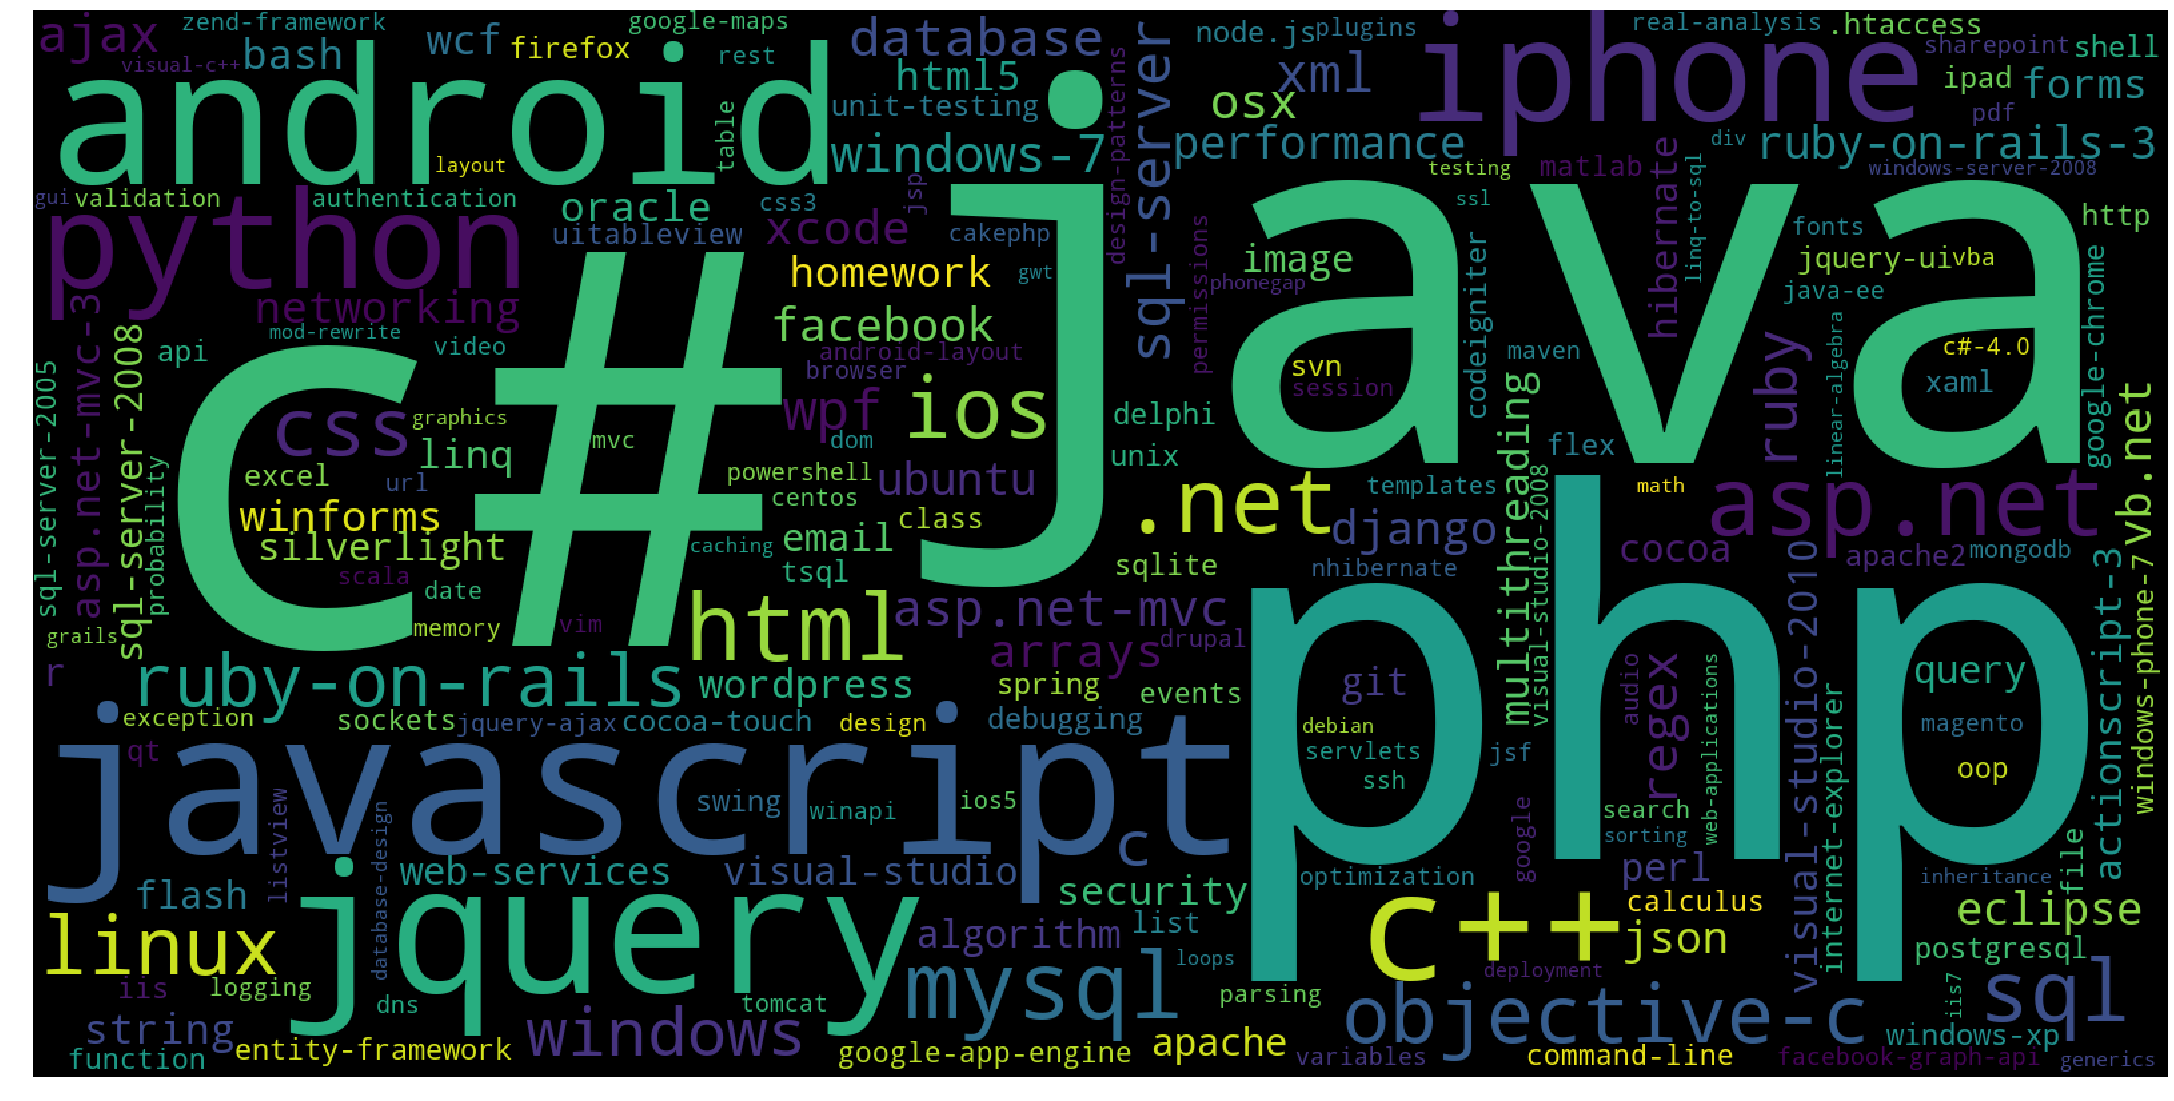

In [16]:

from wordcloud import WordCloud
from datetime import datetime
start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(dic.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

In [17]:
type(result)

list

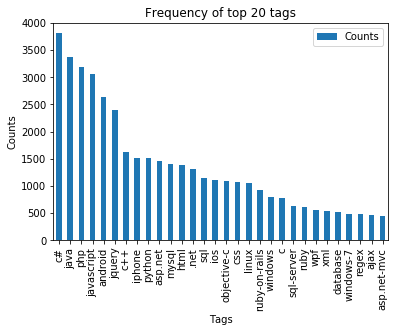

In [18]:
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')

plt.ylabel('Counts')
plt.show()

In [19]:
df = train[['Title', 'Body', 'Tags']]
df.head()

,Title,Body,Tags
0,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents
